In [ ]:
"""
Part 3a
i. k-NN finds the k cloests songs based on feature similarity and averages their popularity
to predict for new songs.

ii. Small k makes the model very sensitive to noise and overfits the data. Large k leads
to underfitting. The best k minimizes validation MSE.

iii. If MSE increases then removed features were important. If MSE stays the same or 
decreases then removed features were irrelevant or noisy.

iv. Without scaling, MSE is high and k-NN struggles with different feature ranges. 
Stardardization works well if features have different units.
"""

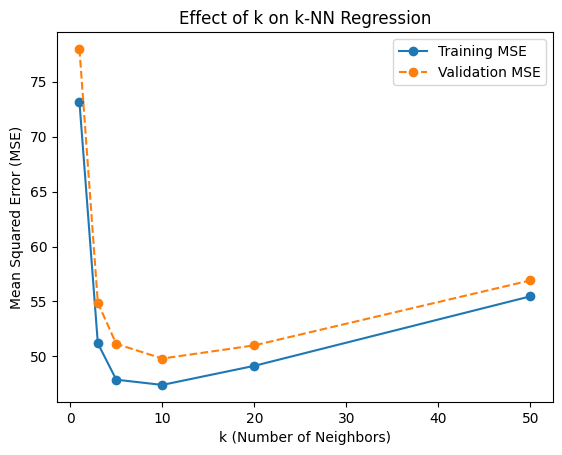

In [7]:
# part a ii justification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("Top_spotify_songs.csv")
features = [ "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", 
            "valence", "tempo"]
target = "popularity"
X = df[features]
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
k_values = [1, 3, 5, 10, 20, 50]
mse_train, mse_val = [], []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)

    mse_train.append(mean_squared_error(y_train, knn.predict(X_train)))
    mse_val.append(mean_squared_error(y_val, knn.predict(X_val)))

plt.plot(k_values, mse_train, marker='o', label="Training MSE")
plt.plot(k_values, mse_val, marker='o', linestyle="dashed", label="Validation MSE")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of k on k-NN Regression")
plt.legend()
plt.show()


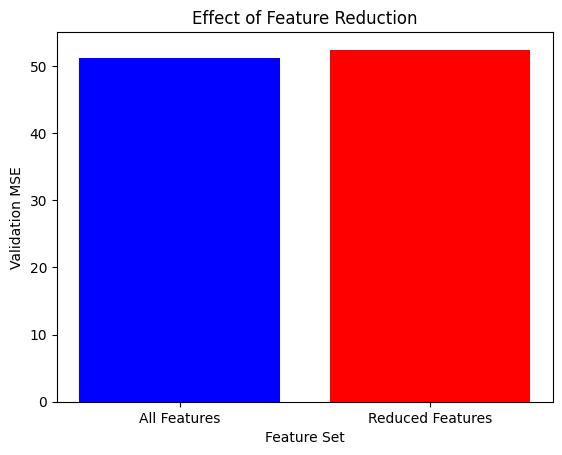

In [8]:
# part a iii justification

feature_sets = [["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"],  
    ["danceability", "energy", "valence"]]
mse_features = []

for features in feature_sets:
    X_train_subset, X_val_subset = X_train[features], X_val[features]
    knn = KNeighborsRegressor(n_neighbors = 5)
    knn.fit(X_train_subset, y_train)
    mse_features.append(mean_squared_error(y_val, knn.predict(X_val_subset)))

plt.bar(["All Features", "Reduced Features"], mse_features, color=["blue", "red"])
plt.xlabel("Feature Set")
plt.ylabel("Validation MSE")
plt.title("Effect of Feature Reduction")
plt.show()

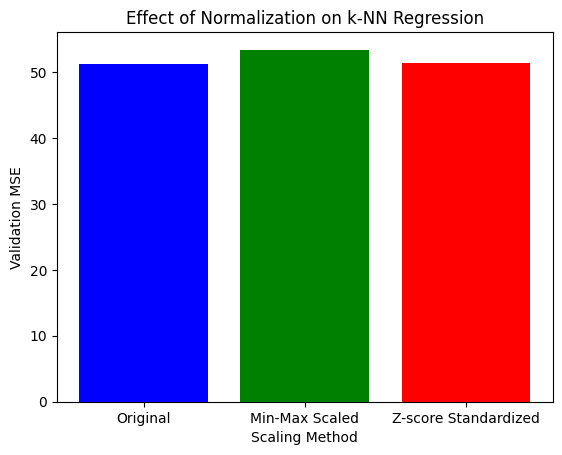

In [9]:
# part a iv justification

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_val_minmax = scaler_minmax.transform(X_val)

scaler_standard = StandardScaler()
X_train_std = scaler_standard.fit_transform(X_train)
X_val_std = scaler_standard.transform(X_val)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)  
mse_original = mean_squared_error(y_val, knn.predict(X_val))

knn.fit(X_train_minmax, y_train)
mse_minmax = mean_squared_error(y_val, knn.predict(X_val_minmax))

knn.fit(X_train_std, y_train)
mse_standard = mean_squared_error(y_val, knn.predict(X_val_std))

plt.bar(["Original", "Min-Max Scaled", "Z-score Standardized"], [mse_original, mse_minmax, mse_standard], color=["blue", "green", "red"])
plt.xlabel("Scaling Method")
plt.ylabel("Validation MSE")
plt.title("Effect of Normalization on k-NN Regression")
plt.show()
